In [5]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow_addons as tfa
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator

In [10]:
#! cd /kaggle/input/chest-xray/chest_xray && chmod 777 /kaggle/input/chest-xray/chest_xray/train

chmod: changing permissions of '/kaggle/input/chest-xray/chest_xray/train': Read-only file system


In [12]:
#! cd /kaggle/input/chest-xray/chest_xray && ls -ltr

total 0
drwxr-xr-x 4 nobody nogroup 0 May 21 17:09 test
drwxr-xr-x 4 nobody nogroup 0 May 21 17:09 train
drwxr-xr-x 4 nobody nogroup 0 May 21 17:09 val


In [17]:
def remove_directory(directory_path):
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Directory '{directory_path}' and its contents have been successfully removed.")
    else:
        print(f"Directory '{directory_path}' does not exist.")

directory_path = "/kaggle/working/train_val_dir"
remove_directory(directory_path)

Directory '/kaggle/working/train_val_dir' and its contents have been successfully removed.


In [18]:
train_val_dir = '/kaggle/working/train_val_dir'
os.makedirs(train_val_dir, exist_ok=True)

In [21]:
def merge_images(source_folder, destination_folder):
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            class_name = os.path.basename(root)
            source_path = os.path.join(root, file)
            destination_path = os.path.join(destination_folder, os.path.basename(root), file)
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)
            shutil.copyfile(source_path, destination_path)

In [22]:
# Merge training and validation data
val_source = val_dir
val_destination = train_val_dir

train_source = train_dir
train_destination = train_val_dir

merge_images(train_source, train_destination)
merge_images(val_source, val_destination)

Train set:
PNEUMONIA=3883
NORMAL=1349
Test set:
PNEUMONIA=390
NORMAL=234


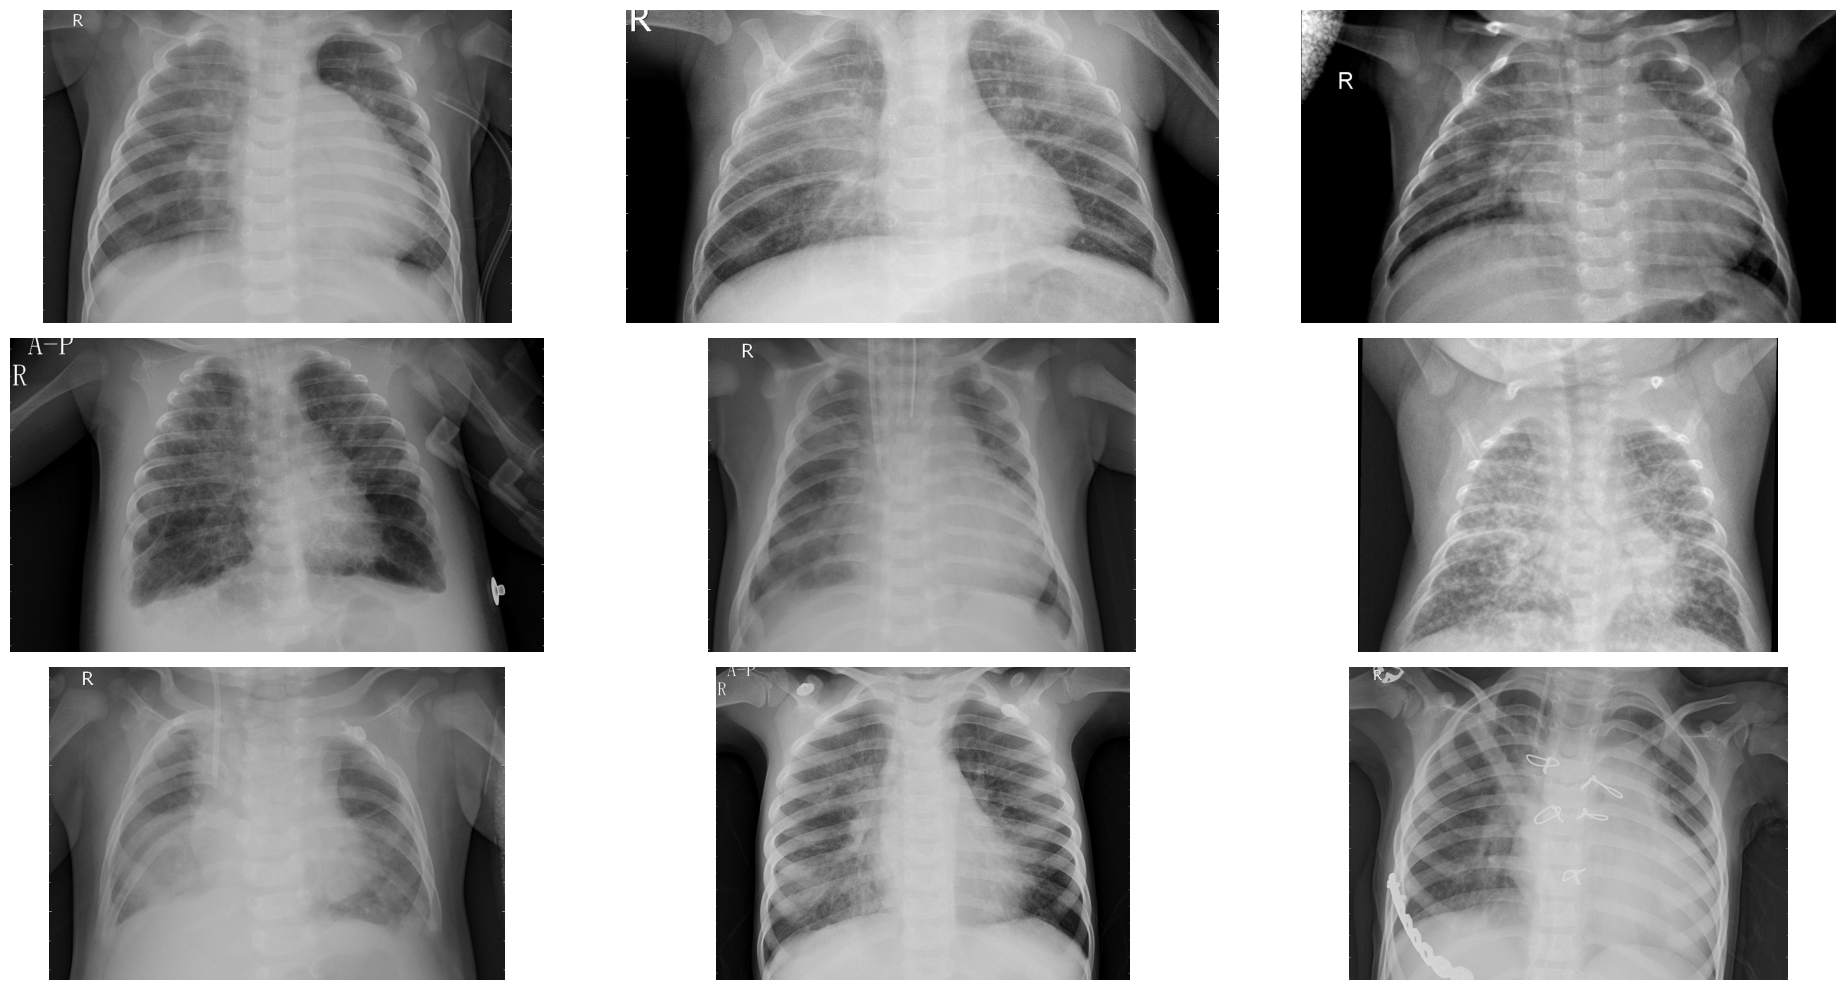

In [30]:
train_dir = "/kaggle/working/train_val_dir"
test_dir = "/kaggle/input/chest-xray/chest_xray/test"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")


pneumonia = os.listdir("/kaggle/working/train_val_dir/PNEUMONIA")
pneumonia_dir = "/kaggle/working/train_val_dir/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

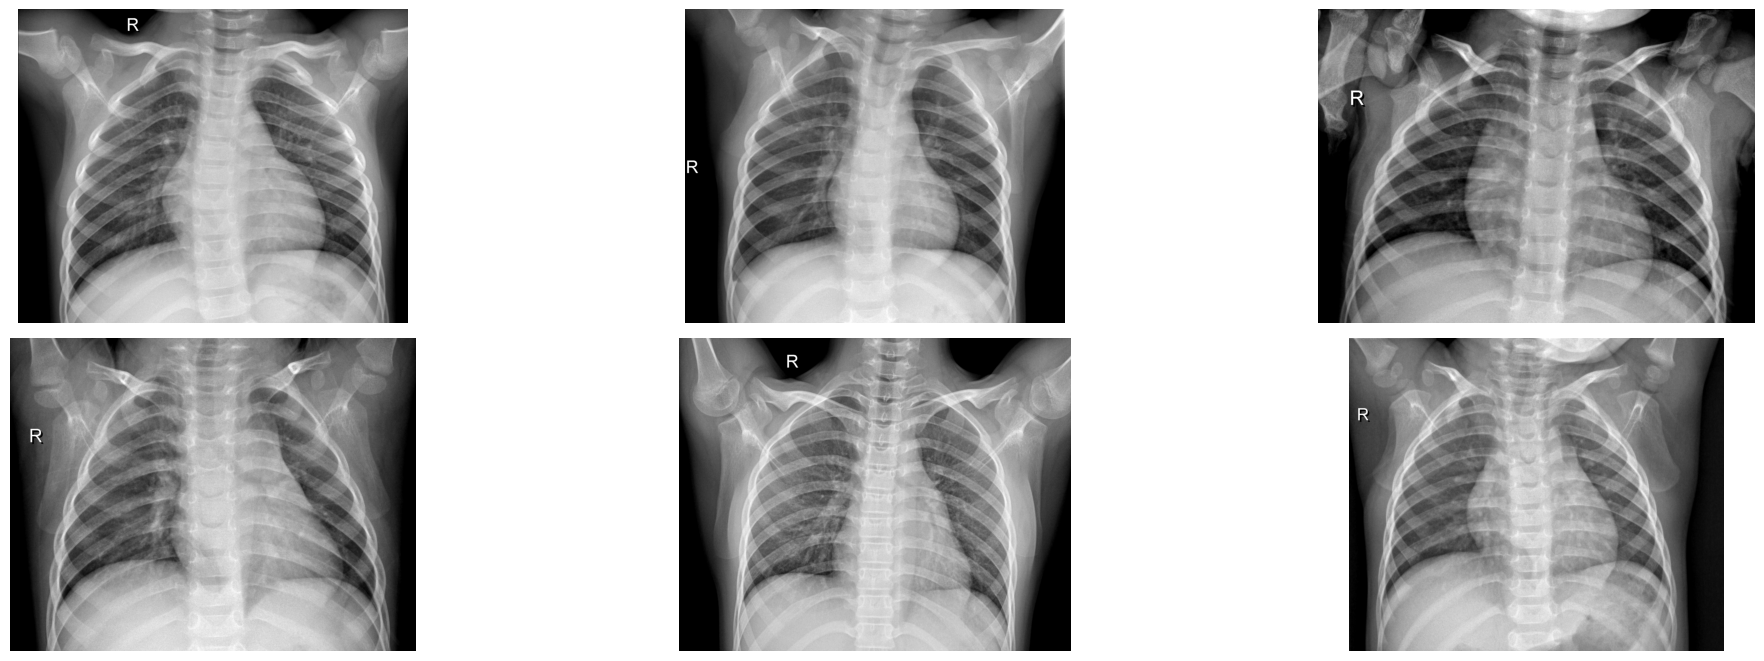

In [31]:
normal = os.listdir("/kaggle/working/train_val_dir/NORMAL")
normal_dir = "/kaggle/working/train_val_dir/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

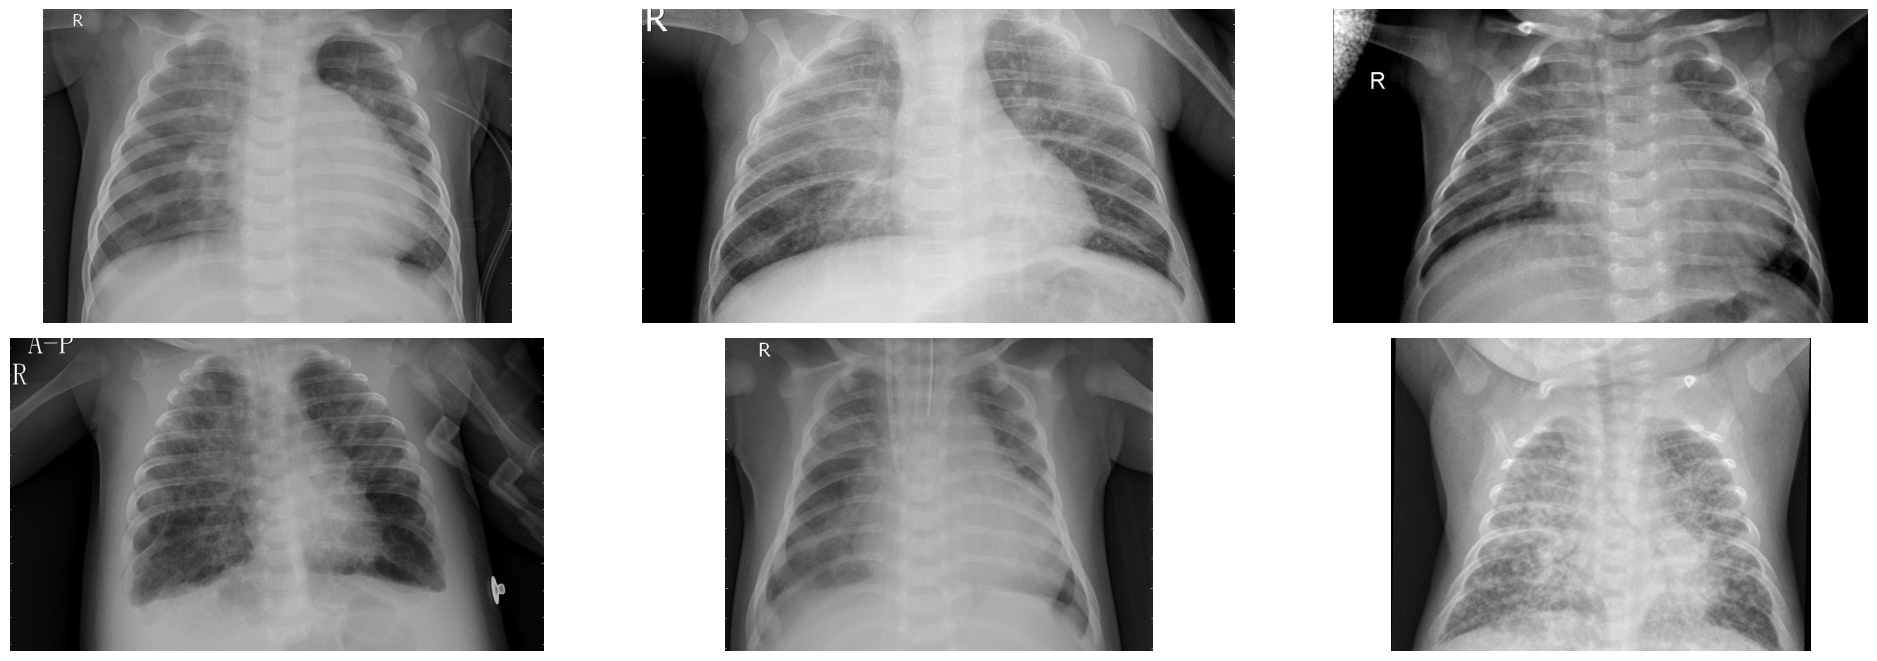

In [32]:
pneumonia = os.listdir("/kaggle/working/train_val_dir/PNEUMONIA")
pneumonia_dir = "//kaggle/working/train_val_dir/PNEUMONIA"
plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]), )
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 1437 pixels width and 1786 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 126.4531 and the standard deviation is 62.3941


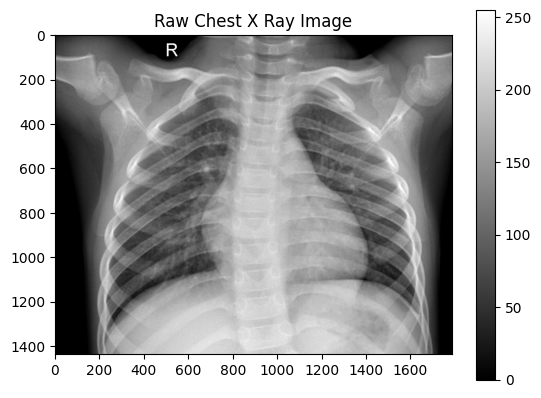

In [33]:
normal_img = os.listdir("/kaggle/working/train_val_dir/NORMAL")[0]
normal_dir = "/kaggle/working/train_val_dir/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

In [100]:
img_height = 96
img_width = 96

In [101]:
image_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    validation_split=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)


train_ds = image_generator.flow_from_directory(train_val_dir, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    color_mode='grayscale',
                                                      subset='training',
                                                    class_mode='binary')
val_ds = image_generator.flow_from_directory(train_val_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    subset='validation')


test_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=20,
                                  width_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  samplewise_center=True,
                                  samplewise_std_normalization=True)

test_ds = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode='binary',
                                                  color_mode='grayscale')

Found 4710 images belonging to 2 classes.
Found 522 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [98]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

weight_for_0 = (1 / num_normal)*(num_normal + num_pneumonia)/2.0 
weight_for_1 = (1 / num_pneumonia)*(num_normal + num_pneumonia)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 1.94
Weight for class 1: 0.67


In [102]:
class ConvolutionalTokenizer(layers.Layer):
    """
    Creates Convolutional Tokens of images for feeding to Transformer Encoder.
    """
    def __init__(self,kernel_size=4,stride=1,padding=1,pooling_kernel_size=2,pooling_stride=2,conv_layers=2,num_output_channels=[64, 96],**kwargs,):
        super(ConvolutionalTokenizer, self).__init__(**kwargs)

        # Creating a Sequential Keras Model for Tokenizing images
        self.conv_model = keras.Sequential()
        # Created the required number of convolutional layer
        for i in range(conv_layers):
            # Adding a conv2d layer with ReLU activation as suggested by authors
            self.conv_model.add(layers.Conv2D(num_output_channels[i],kernel_size,stride,padding="valid",use_bias=False,activation="relu",kernel_initializer="he_normal"))
#             self.conv_model.add(layers.BatchNormalization())
            # Zero Padding
            self.conv_model.add(layers.ZeroPadding2D(padding))
            # Pooling over the image with 3x3 kernel having padding='same' and stride=2
            self.conv_model.add(layers.MaxPool2D(pooling_kernel_size, pooling_stride, "same"))

    def call(self, images):
        # Reshaping the outputs by flattening them
        outputs = self.conv_model(images)
        Flattened = tf.reshape(
            outputs,
            (-1, tf.shape(outputs)[1] * tf.shape(outputs)[2], tf.shape(outputs)[3]),
        )
        return Flattened

    # Adding Learnable Positional Embeddings
    def pos_embeddings(self, image_size):
        inp = tf.ones((1, image_size, image_size, 1))
        out = self.call(inp)
        seq_len = tf.shape(out)[1]
        projection_dim = tf.shape(out)[-1]

        embed_layer = layers.Embedding(
            input_dim=seq_len, output_dim=projection_dim
        )
        return embed_layer, seq_len

In [103]:
def mlp(x, hidden_units, dropout):
    """
    Creates A Feed Forward Network`

    Args:
        hidden_units: Number of hidden units in MLP
        dropout: The Rate of dropout which is to be applied.
    """
    for units in hidden_units:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(dropout)(x)
    return x

In [104]:
def Transformer_Encoder(L,embedded_patches,num_heads,projection_dim,transformer_units):
    """
    Transformer Encoder Block

    Args:
        L: number of transformer_layers

        embedded_patches: Patches from the Convolutional Tokenizer block

        num_heads: Number of Attention Heads

        projection_dim: Size of each attention head for query and key

        transformer_units: hidden units of MLP
    """


    # Iterating over the number of transformer layers
    for i in range(L):
        # Normalizing the input patches
        norm = layers.LayerNormalization(epsilon=1e-5)(embedded_patches)
        # Feeding to MHA
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.1)(norm,norm)
        # Shortcut skip connection
        skip1 = layers.Add()([attention_output, embedded_patches])
        # Normalizing
        norm2= layers.LayerNormalization(epsilon=1e-5)(skip1)

        # Feed Forward MLP
        ffn = mlp(norm2, hidden_units=transformer_units, dropout=0.1)

        # Shortcut skip connection
        embedded_patches = layers.Add()([ffn, skip1])

        return embedded_patches

In [105]:
def SeqPool(trans_enco_out):
    """
    Sequence Pooling block.

    Args:
        trans_enco_out: Takes in the Output of transformer encoder block

    Returns:
        A 1xD output to be fed to final classifier
    """
    # Normalizing the output of transformer enocder layer
    normalized = layers.LayerNormalization(epsilon=1e-5)(trans_enco_out)
    # Adding a linear layer
    linear=layers.Dense(1)(normalized)
    # Applying Softmax to the linear layer
    soft = tf.nn.softmax(linear, axis=1)
    # Multiplying the softmax of linear layer with the normalized output of orignal output of the transformer encoder block
    mult = tf.matmul(soft, normalized, transpose_a=True)
    # Squeezing the dimensions
    seq_pool_output = tf.squeeze(mult, -2)

    return seq_pool_output

In [106]:
def CompactConvolutionalTransformer(image_size=96,num_classes=2,input_shape=(96,96, 1),projection_dim=96,num_heads=2,L=2,transformer_units=[96,96]):
    """
    CCT model

    Args:
        image_size: size of image

        num_classes: Number of classes of output

        input_shape: shape of image

        projection_dim: Size of each attention head for query and key

        num_heads: Number of heads of MHA

        L: Number of transformer encoder layers

    Returns:
        CCT Model
    """

    inputs = layers.Input(input_shape)
    """
    Convolutional Tokenization Block
    """
    # Encode patches.
    conv_tokenizer = ConvolutionalTokenizer()
    embedded_patches = conv_tokenizer(inputs)

    # Adding positional embedding.
    pos_embed, seq_length = conv_tokenizer.pos_embeddings(image_size)
    positions = tf.range(start=0, limit=seq_length, delta=1)
    position_embeddings = pos_embed(positions)
    embedded_patches += position_embeddings


    """
    Transformer with Sequence Pooling Block
    """

    # Feeding embedded patches after adding embeddings to transformer encoder block
    embedded_patches=Transformer_Encoder(L,embedded_patches,num_heads=num_heads,projection_dim=projection_dim,transformer_units=transformer_units)

    # Applying sequence pooling to output of the transformer encoder block
    sequence_pooling=SeqPool(embedded_patches)

    # Adding a dense layer for predictions
    output= layers.Dense(num_classes,activation='softmax')(sequence_pooling)

    model = keras.Model(inputs=inputs, outputs=output)
    return model

In [107]:
CompactConvolutionalTransformer().summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 convolutional_tokenizer_12 (Co  (None, 576, 96)     99328       ['input_13[0][0]']               
 nvolutionalTokenizer)                                                                            
                                                                                                  
 tf.__operators__.add_12 (TFOpL  (None, 576, 96)     0           ['convolutional_tokenizer_12[0][0
 ambda)                                                          ]']                              
                                                                                            

In [108]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

# Open a strategy scope.
with strategy.scope():
    # Instantiating our CCT model
    cct_model = CompactConvolutionalTransformer()
    # Compiling our Model
    cct_model.compile(
        optimizer='adam',
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
#checkpoint_cb = ModelCheckpoint("xray_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Training model for 30 epochs
history = cct_model.fit(
    train_ds,
    class_weight=class_weight,
    epochs=30,
    callbacks=[early_stopping],
    validation_data=val_ds
)

Number of devices: 2
Epoch 1/30
148/148 [==============================] - 51s 261ms/step - loss: 0.6228 - accuracy: 0.6637 - val_loss: 0.3941 - val_accuracy: 0.8199
Epoch 2/30
148/148 [==============================] - 38s 255ms/step - loss: 0.3665 - accuracy: 0.8454 - val_loss: 0.3532 - val_accuracy: 0.8563
Epoch 3/30
148/148 [==============================] - 38s 257ms/step - loss: 0.3104 - accuracy: 0.8713 - val_loss: 0.3002 - val_accuracy: 0.8640
Epoch 4/30
148/148 [==============================] - 38s 256ms/step - loss: 0.2843 - accuracy: 0.8794 - val_loss: 0.4971 - val_accuracy: 0.8084
Epoch 5/30
148/148 [==============================] - 38s 254ms/step - loss: 0.2673 - accuracy: 0.8911 - val_loss: 0.2896 - val_accuracy: 0.8793
Epoch 6/30
148/148 [==============================] - 38s 257ms/step - loss: 0.2545 - accuracy: 0.8932 - val_loss: 0.2318 - val_accuracy: 0.9080
Epoch 7/30
148/148 [==============================] - 38s 260ms/step - loss: 0.2535 - accuracy: 0.8945 - val_

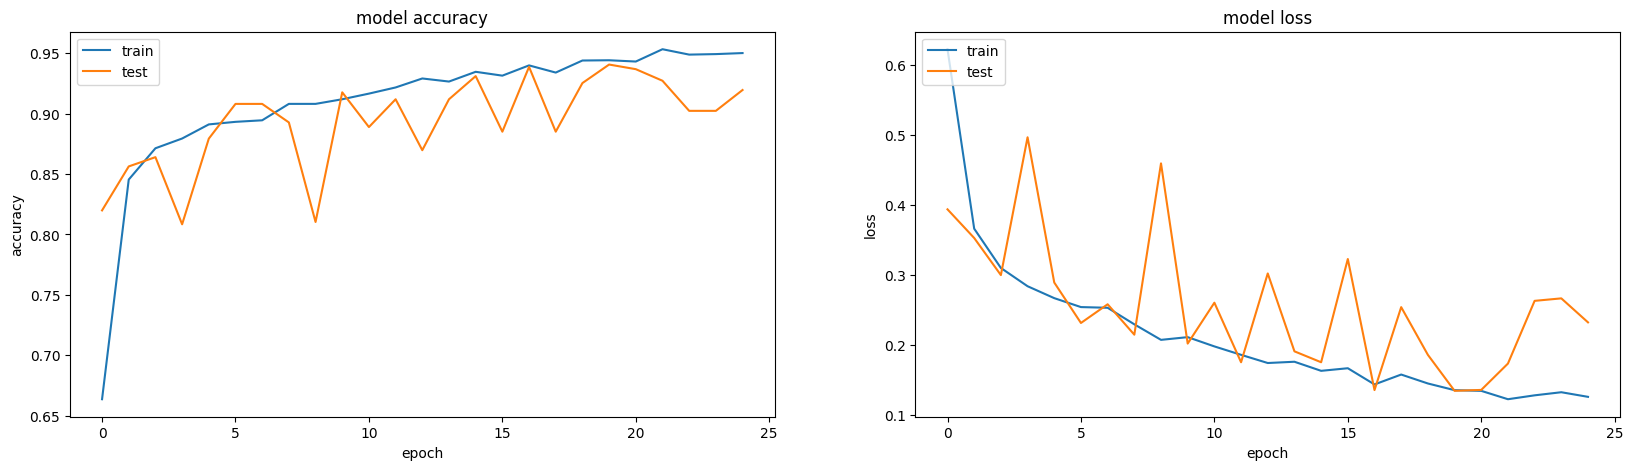

In [109]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [110]:
evaluation = cct_model.evaluate(test_ds)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cct_model.evaluate(train_ds)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 5s 228ms/step - loss: 0.2661 - accuracy: 0.9071
Test Accuracy: 90.71%
148/148 [==============================] - 33s 222ms/step - loss: 0.1674 - accuracy: 0.9312
Train Accuracy: 93.12%


In [111]:
predicted_vals = cct_model.predict(test_ds, steps=len(test_ds))

20/20 [==============================] - 6s 212ms/step


In [112]:
predicted_categories = np.argmax(predicted_vals, axis = 1)

In [113]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(confusion_matrix(test_ds.classes, predicted_categories))
pd.DataFrame(classification_report(test_ds.classes, predicted_categories, output_dict=True))

[[189  45]
 [ 16 374]]


,0,1,accuracy,macro avg,weighted avg
precision,0.921951,0.892601,0.902244,0.907276,0.903608
recall,0.807692,0.958974,0.902244,0.883333,0.902244
f1-score,0.861048,0.924598,0.902244,0.892823,0.900767
support,234.000000,390.000000,0.902244,624.000000,624.000000


In [115]:
export_path = 'model/cct-chest-xray-classification'
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    cct_model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    
    )

export_path = model/cct-chest-xray-classification



In [117]:
! zip -r cct_model.zip 'model/cct-chest-xray-classification'

  adding: model/cct-chest-xray-classification/ (stored 0%)
  adding: model/cct-chest-xray-classification/assets/ (stored 0%)
  adding: model/cct-chest-xray-classification/fingerprint.pb (stored 0%)
  adding: model/cct-chest-xray-classification/saved_model.pb (deflated 67%)
  adding: model/cct-chest-xray-classification/keras_metadata.pb (deflated 59%)
  adding: model/cct-chest-xray-classification/variables/ (stored 0%)
  adding: model/cct-chest-xray-classification/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model/cct-chest-xray-classification/variables/variables.index (deflated 70%)


In [118]:
#Save model
import os
from IPython.display import FileLink
os.chdir(r'/kaggle/working')
FileLink(r'cct_model.zip')

/kaggle/working/cct_model.zip